In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn

In [2]:
cancer = load_breast_cancer()
#cancer.keys()
np.count_nonzero(cancer.feature_names)

30

In [3]:
x_train, x_test = train_test_split(cancer.data, random_state=42, stratify=cancer.target)
y_train, y_test = train_test_split(cancer.target, random_state=42, stratify=cancer.target)
# stratify makes a split so that the proportion of values in the sample produced (xtest ytest and so on) will be the same as each proportion of values provided to parameter stratify.

# K Neighbor algorithms

In [7]:
# train the model from 1 to 11 neighbors
neigh_settings = range(1,11)
test_acc = []
train_acc = []
for n_neigh in neigh_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neigh)
    clf.fit(x_train,y_train)
    train_acc.append(clf.score(x_train,y_train))
    test_acc.append(clf.score(x_test,y_test))

In [8]:
print(test_acc)
print(train_acc)

[0.916083916083916, 0.9020979020979021, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9230769230769231, 0.9440559440559441, 0.9440559440559441, 0.958041958041958, 0.9440559440559441]
[1.0, 0.9624413145539906, 0.9577464788732394, 0.9483568075117371, 0.9413145539906104, 0.9413145539906104, 0.9389671361502347, 0.9413145539906104, 0.9366197183098591, 0.9366197183098591]


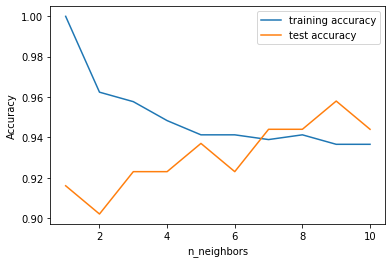

In [10]:
plt.plot(neigh_settings, train_acc, label="training accuracy")
plt.plot(neigh_settings, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Linear Logistic algorithm

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000).fit(x_train,y_train)
print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))
# The default value of C=1 provides quite good performance
# but both of them are very close

0.9577464788732394
0.958041958041958


In [5]:
logreg = LogisticRegression(C=200,max_iter=10000).fit(x_train,y_train)
print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))
# in this case, more complex model perform better

0.9835680751173709
0.9790209790209791


In [7]:
logreg = LogisticRegression(C=0.0005,max_iter=10000).fit(x_train,y_train)
print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))

0.9389671361502347
0.9440559440559441


# Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test = train_test_split(cancer.data, random_state=42, stratify=cancer.target)
y_train, y_test = train_test_split(cancer.target, random_state=42, stratify=cancer.target)

In [6]:
tree = DecisionTreeClassifier(random_state=0).fit(x_train,y_train)
print(tree.score(x_train,y_train))
print(tree.score(x_test,y_test))

1.0
0.9370629370629371


In [7]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(x_train,y_train)
print(tree.score(x_train,y_train))
print(tree.score(x_test,y_test))

0.9882629107981221
0.951048951048951


In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [9]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

# Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
train_acc = []
test_acc = []
for esti in (5,10,15,20,100):
    forest = RandomForestClassifier(random_state=0, n_estimators=esti, max_features=30)
    forest.fit(x_train, y_train)
    train_acc.append(forest.score(x_train,y_train))
    test_acc.append(forest.score(x_test,y_test))

In [102]:
print(train_acc)
print(test_acc)

[0.9835680751173709, 0.9929577464788732, 0.9976525821596244, 1.0, 1.0]
[0.958041958041958, 0.951048951048951, 0.965034965034965, 0.965034965034965, 0.986013986013986]


In [115]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
lists = []
for esti in (5,10,15,20,100):
    forest = RandomForestClassifier(random_state=0, n_estimators=esti, max_features=30)
    forest.fit(x_train, y_train)
    lists.append([[forest.score(x_train,y_train),forest.score(x_test,y_test)]])
lists

[[[0.9835680751173709, 0.958041958041958]],
 [[0.9929577464788732, 0.951048951048951]],
 [[0.9976525821596244, 0.965034965034965]],
 [[1.0, 0.965034965034965]],
 [[1.0, 0.986013986013986]]]

# Gradient Boosting

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(x_train, y_train)
print(gbrt.score(x_train,y_train))
print(gbrt.score(x_test,y_test))

0.9906103286384976
0.972027972027972


# Support Vector Machine Kernel

In [24]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC(gamma="auto").fit(x_train, y_train)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

1.0
0.6293706293706294


In [35]:
# compute the minimum value per feature on the training set
min_on_training = x_train.min(axis=0)
#min_on_test = x_test.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (x_train - min_on_training).max(axis=0)
#range_on_test = (x_test - min_on_test).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
x_train_scaled = (x_train - min_on_training) / range_on_training
x_test_scaled = (x_test - min_on_training) / range_on_training
svc2 = SVC(gamma="auto", C=1000).fit(x_train_scaled, y_train)
print(svc2.score(x_train_scaled,y_train))
print(svc2.score(x_test_scaled,y_test))

0.9882629107981221
0.972027972027972


# Neural Network

In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
mlp = MLPClassifier(random_state=42).fit(x_train, y_train)
print(mlp.score(x_train,y_train))
print(mlp.score(x_test,y_test))

0.9389671361502347
0.916083916083916


In [10]:
mean_on_train = x_train.mean(axis=0)
std_on_train = x_train.std(axis=0)
x_train_scaled = (x_train - mean_on_train)/std_on_train
x_test_scaled = (x_test - mean_on_train)/std_on_train
mlp = MLPClassifier(random_state=42, max_iter=10000, alpha=1).fit(x_train_scaled, y_train)
print(mlp.score(x_train_scaled,y_train))
print(mlp.score(x_test_scaled,y_test))

0.9882629107981221
0.986013986013986


# MinMaxScaler

In [3]:
x_train, x_test = train_test_split(cancer.data, random_state=42)
y_train, y_test = train_test_split(cancer.target, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
print(x_train_scaled.min(axis=0))
print(x_train_scaled.max(axis=0))
print(x_test_scaled.min(axis=0))
print(x_test_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[-0.03477154  0.0226581  -0.02937829 -0.01154209  0.1185339   0.05547565
  0.          0.         -0.0571276   0.05686605  0.00184682  0.00057461
  0.00067851  0.00402131  0.04949519  0.02556554  0.          0.
  0.03092687  0.01120048 -0.02733718  0.01252665 -0.02074119 -0.00952759
  0.11424302  0.03036426  0.          0.          0.00019712  0.03399457]
[0.85846516 0.72404464 0.87907241 0.73268686 0.76257109 1.11643038
 0.87956888 0.91699801 0.92845702 0.68386689 0.42712294 0.7814268
 0.41831975 0.36028898 0.48703131 0.78219725 0.76717172 0.62928585
 1.32643996 0.75885466 0.87025802 0.93656716 0.81088913 0.79605002
 1.02852679 1.13188961 1.30308077 0.9975945  0.76384782 1.29247202]


# PCA

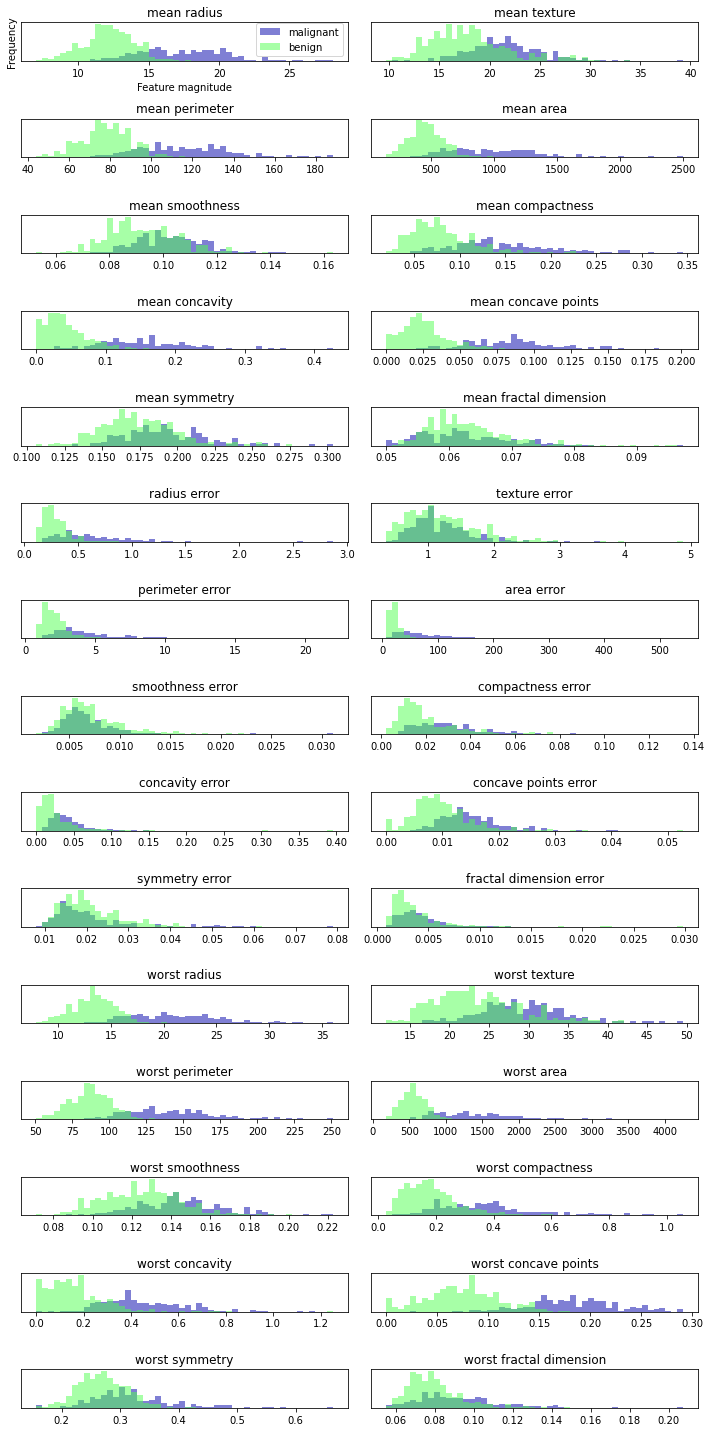

In [4]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

NameError: name 'x_scaled' is not defined

Text(0, 0.5, 'Second principal component')

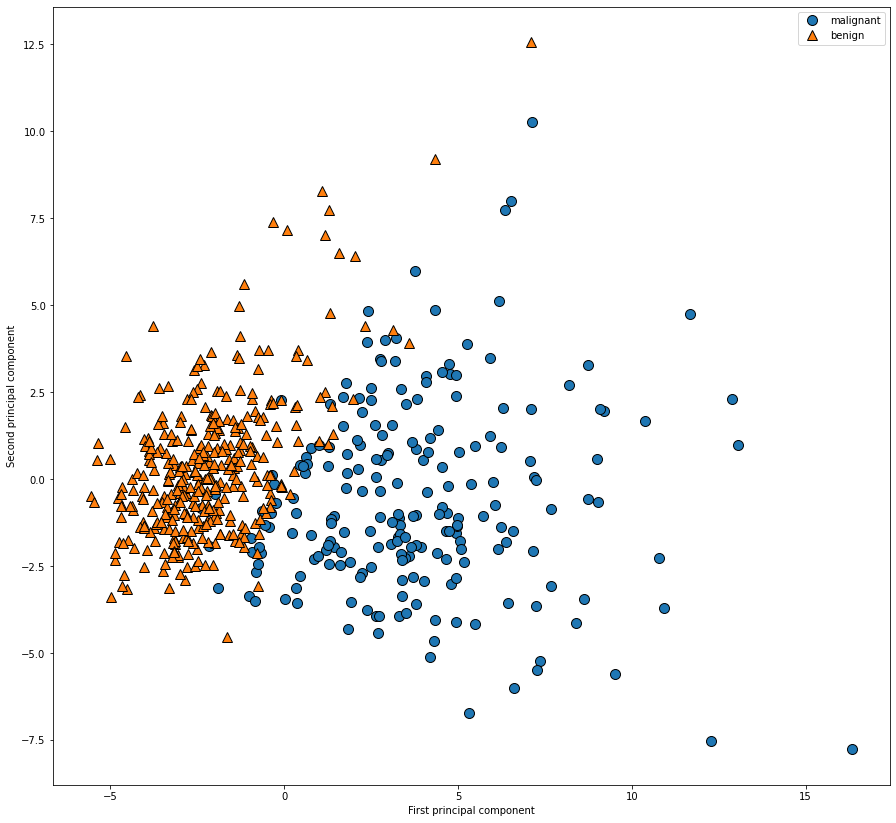

In [15]:
plt.figure(figsize=(15, 15))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [16]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, 'Principal components')

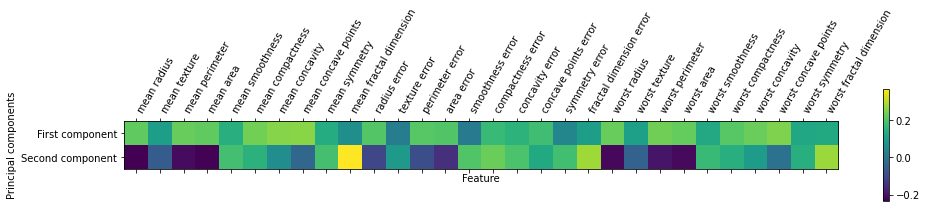

In [6]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")